In [2]:
import numpy as np
import pandas as pd
import os
import re
from IPython.display import display,HTML
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = {}
for x in os.listdir('DATA/365_database'):
    tabel = re.findall(r'365_(.*).csv',x)[0]
    df[tabel] = pd.read_csv(f'DATA/365_database/{x}')
    print(f'created.. {tabel}')

created.. course_info
created.. course_ratings
created.. exam_info
created.. quiz_info
created.. student_engagement
created.. student_exams
created.. student_hub_questions
created.. student_info
created.. student_learning
created.. student_purchases
created.. student_quizzes


In [3]:
df['key_dates'] = pd.DataFrame({'date':pd.date_range(start='2022-01-01', end='2022-10-20', freq='D')})
df['key_dates']['event'] = np.nan
df['key_dates'].loc[(df['key_dates']['date'] >= '2022-01-17') & (df['key_dates']['date'] <= '2022-01-28'),'event'] = 'Winter Sale'
df['key_dates'].loc[(df['key_dates']['date'] >= '2022-03-21') & (df['key_dates']['date'] <= '2022-03-31'),'event'] = 'Spring Special Offer'
df['key_dates'].loc[(df['key_dates']['date'] >= '2022-05-20') & (df['key_dates']['date'] <= '2022-06-1'),'event'] = 'Data Science Summer Campaign'
df['key_dates'].loc[(df['key_dates']['date'] >= '2022-07-18') & (df['key_dates']['date'] <= '2022-07-29'),'event'] = 'Most Wanted Campaign'
df['key_dates'].loc[df['key_dates']['date'] == '2022-09-16','event'] = 'Platform gamification'
df['key_dates'].loc[(df['key_dates']['date'] >= '2022-09-19') & (df['key_dates']['date'] <= '2022-09-30'),'event'] = 'Data Science Hero Campaign'
df['key_dates'] = df['key_dates'].dropna(axis=0)
df['key_dates']

,date,event
16,2022-01-17,Winter Sale
17,2022-01-18,Winter Sale
18,2022-01-19,Winter Sale
19,2022-01-20,Winter Sale
20,2022-01-21,Winter Sale
...,...,...
268,2022-09-26,Data Science Hero Campaign
269,2022-09-27,Data Science Hero Campaign
270,2022-09-28,Data Science Hero Campaign
271,2022-09-29,Data Science Hero Campaign


In [4]:
timeline = pd.date_range(start='2022-01-01', end='2022-10-20', freq='D').astype(str)
onboard_date = df['student_engagement'].groupby('student_id')['date_engaged'].min().sort_values()
onboard = pd.DataFrame(data=np.cumsum((onboard_date.values.reshape(-1,1) == timeline.values),axis=1).astype(bool),index=onboard_date.index,columns=timeline.values)
onboard.head()

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2022-10-11,2022-10-12,2022-10-13,2022-10-14,2022-10-15,2022-10-16,2022-10-17,2022-10-18,2022-10-19,2022-10-20
student_id,,,,,,,,,,,,,,,,,,,,,
258798,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
258848,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
258849,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
258851,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
258852,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [5]:
dd = onboard.stack().reset_index()
df['is_onboard'] = dd[dd[0]].drop(columns=[0]).reset_index(drop=True).rename(columns={'level_1':'date'})
df['is_onboard']

,student_id,date
0,258798,2022-01-01
1,258798,2022-01-02
2,258798,2022-01-03
3,258798,2022-01-04
4,258798,2022-01-05
...,...,...
2470259,295397,2022-10-20
2470260,295393,2022-10-20
2470261,295390,2022-10-20
2470262,295405,2022-10-20


In [6]:
register_date = df['student_info'].set_index('student_id')['date_registered']
register = pd.DataFrame(data=np.cumsum((register_date.values.reshape(-1,1) == timeline.values),axis=1).astype(bool),index=register_date.index,columns=timeline.values)
register

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2022-10-11,2022-10-12,2022-10-13,2022-10-14,2022-10-15,2022-10-16,2022-10-17,2022-10-18,2022-10-19,2022-10-20
student_id,,,,,,,,,,,,,,,,,,,,,
258798,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
258799,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
258800,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
258801,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
258802,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295511,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
295512,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
295513,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [7]:
dd = register.stack().reset_index()
df['is_register'] = dd[dd[0]].drop(columns=[0]).reset_index(drop=True).rename(columns={'level_1':'date'})
df['is_register']

,student_id,date
0,258798,2022-01-01
1,258798,2022-01-02
2,258798,2022-01-03
3,258798,2022-01-04
4,258798,2022-01-05
...,...,...
4952006,295511,2022-10-20
4952007,295512,2022-10-20
4952008,295513,2022-10-20
4952009,295514,2022-10-20


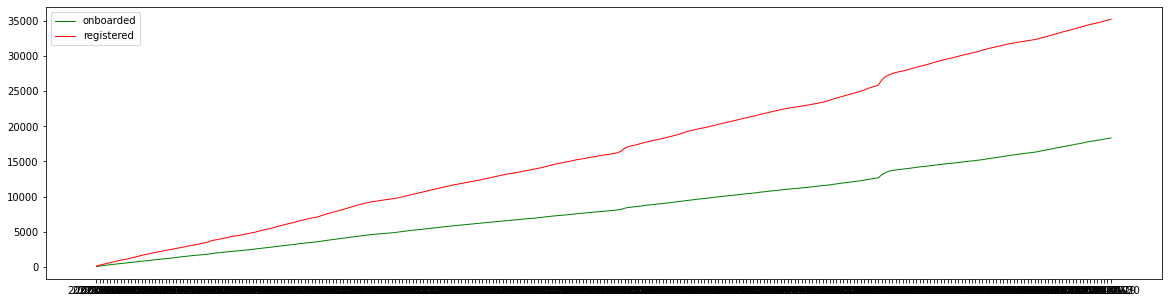

In [8]:
plt.figure(figsize=(20,5))
plt.plot(df['is_onboard'].groupby('date')['student_id'].count().index.values,df['is_onboard'].groupby('date')['student_id'].count().values, color='green', linestyle='-',linewidth=1,label='onboarded')
#plt.fill_between(dates,y2,color='red', alpha=0.3)
plt.plot(df['is_register'].groupby('date')['student_id'].count().index.values,df['is_register'].groupby('date')['student_id'].count().values, color='red', linestyle='-',linewidth=1,label='registered')
plt.legend()
plt.show()

In [9]:
def duration(date,type):
    if type == 'Monthly':
        return pd.to_datetime(date) + pd.Timedelta('30 day')
    if type == 'Quarterly':
        return pd.to_datetime(date) + pd.Timedelta('90 day')
    if type == 'Annual':
        return pd.to_datetime(date) + pd.Timedelta('365 day')

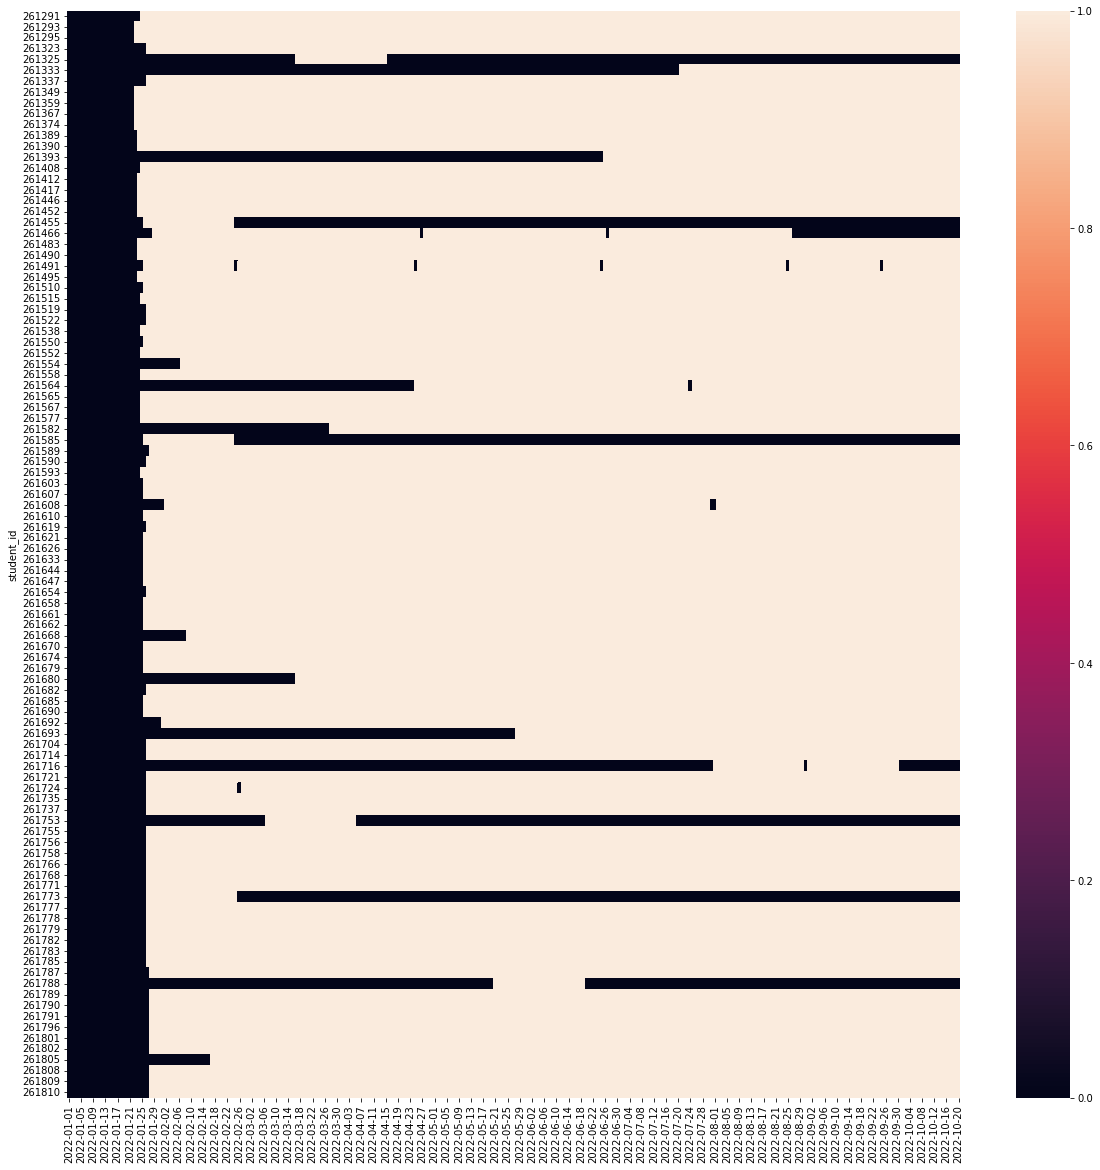

In [10]:
date_end = df['student_purchases'].apply(lambda x: duration(x['date_purchased'],x['purchase_type']), axis=1).astype(str)
data = np.cumsum(df['student_purchases']['date_purchased'].values.reshape(-1,1) == timeline.values,axis=1) - np.cumsum(date_end.values.reshape(-1,1) == timeline.values,axis=1)
subscribed = pd.DataFrame(data=data,index=df['student_purchases']['student_id'],columns=timeline.values).groupby(level=0)[timeline.values].sum() > 0

plt.figure(figsize=(20,20))
sns.heatmap(subscribed[200:300])
plt.show()

In [11]:
dd = subscribed.stack().reset_index()
df['is_subscribed'] = dd[dd[0]].drop(columns=[0]).reset_index(drop=True).rename(columns={'level_1':'date'})
df['is_subscribed']

,student_id,date
0,258800,2022-01-01
1,258800,2022-01-02
2,258800,2022-01-03
3,258800,2022-01-04
4,258800,2022-01-05
...,...,...
272878,295273,2022-10-20
272879,295355,2022-10-19
272880,295355,2022-10-20
272881,295497,2022-10-20


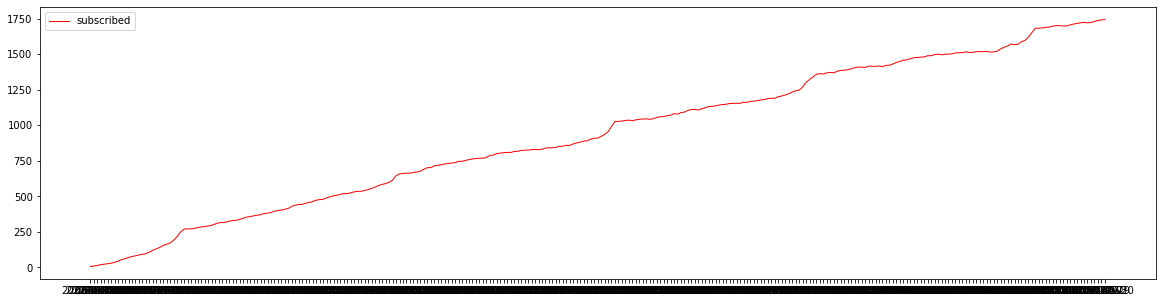

In [12]:
plt.figure(figsize=(20,5))
plt.plot(df['is_subscribed'].groupby('date')['student_id'].count().index.values,df['is_subscribed'].groupby('date')['student_id'].count().values, color='red', linestyle='-',linewidth=1,label='subscribed')
plt.legend()
plt.show()

In [14]:
for k in df.keys():
    df[k].to_csv(f'{k}.csv',index=False)

In [3]:
pd.DataFrame({'date':pd.date_range(start='2022-01-01', end='2022-10-20', freq='D')}).to_csv('timeline.csv',index=False)